In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [98]:
img = cv2.imread('2018-01-16-1638381.jpg', cv2.IMREAD_COLOR)

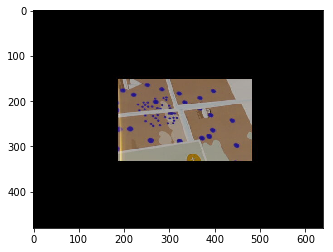

In [99]:
plt.imshow(img)

In [100]:
im_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY);

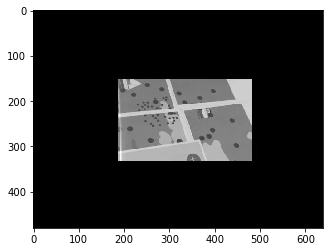

In [101]:
plt.imshow(im_gray, cmap = 'gray')

In [102]:
ret, th = cv2.threshold(im_gray, 100, 255, cv2.THRESH_BINARY_INV);

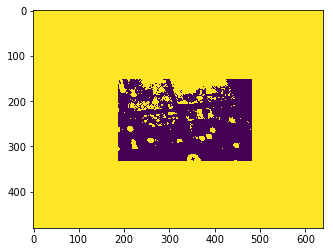

In [103]:
plt.imshow(th)

In [110]:
# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()
 
# Change thresholds
params.minThreshold = 0;
params.maxThreshold = 255;
 
# Filter by Area.
params.filterByArea = True
params.minArea = 1
 
# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = .8
 
# Filter by Convexity
params.filterByConvexity = False
params.minConvexity = 0.87
 
# Filter by Inertia
params.filterByInertia = False
params.minInertiaRatio = 0.01

blur = cv2.blur(im_gray,(2,2))

# Set up the detector with default parameters.
detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs.
keypoints = detector.detect(blur)
 
# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(im_gray, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
 
# Show keypoints
#cv2.imshow("Keypoints", im_with_keypoints)
#cv2.waitKey(0)

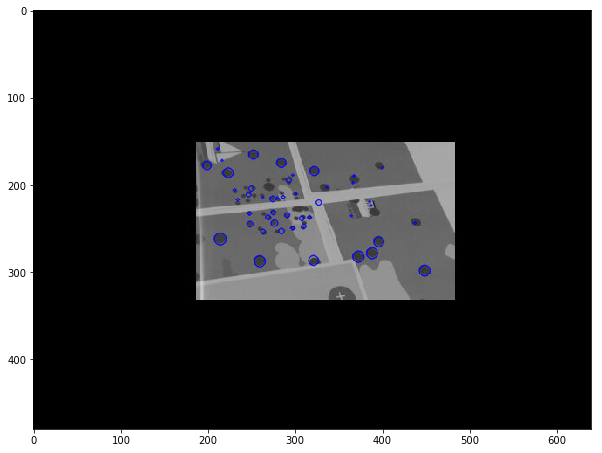

In [111]:
plt.figure(figsize=(10, 10))
plt.imshow(im_with_keypoints)

In [76]:
keypoints[0].pt

(504.5385437011719, 449.27825927734375)

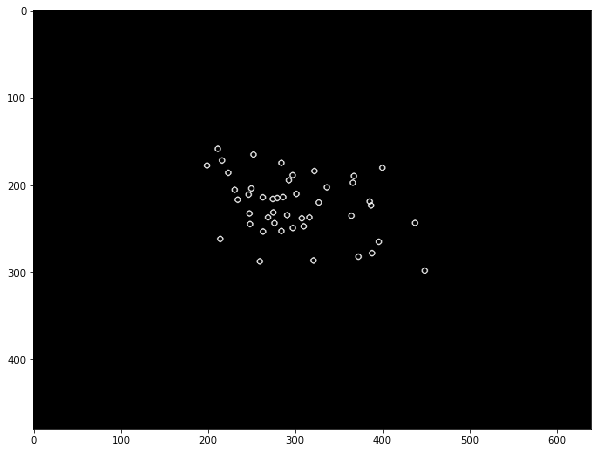

In [116]:
plt.figure(figsize=(10, 10))
plt.imshow(cv2.drawKeypoints(np.zeros_like(im_gray), keypoints, np.array([]), (255,255,255)))

In [139]:
res = np.zeros_like(blur)
for x in keypoints:
    cv2.circle(res, tuple([int(z) for z in x.pt]), 5, (255,255,255), -1)

True

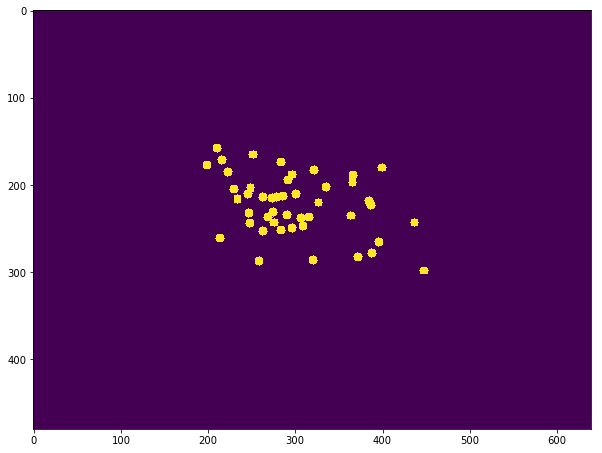

In [140]:
plt.figure(figsize=(10, 10))
plt.imshow(res)
cv2.imwrite('a.png', res)

In [141]:
?cv2.circle